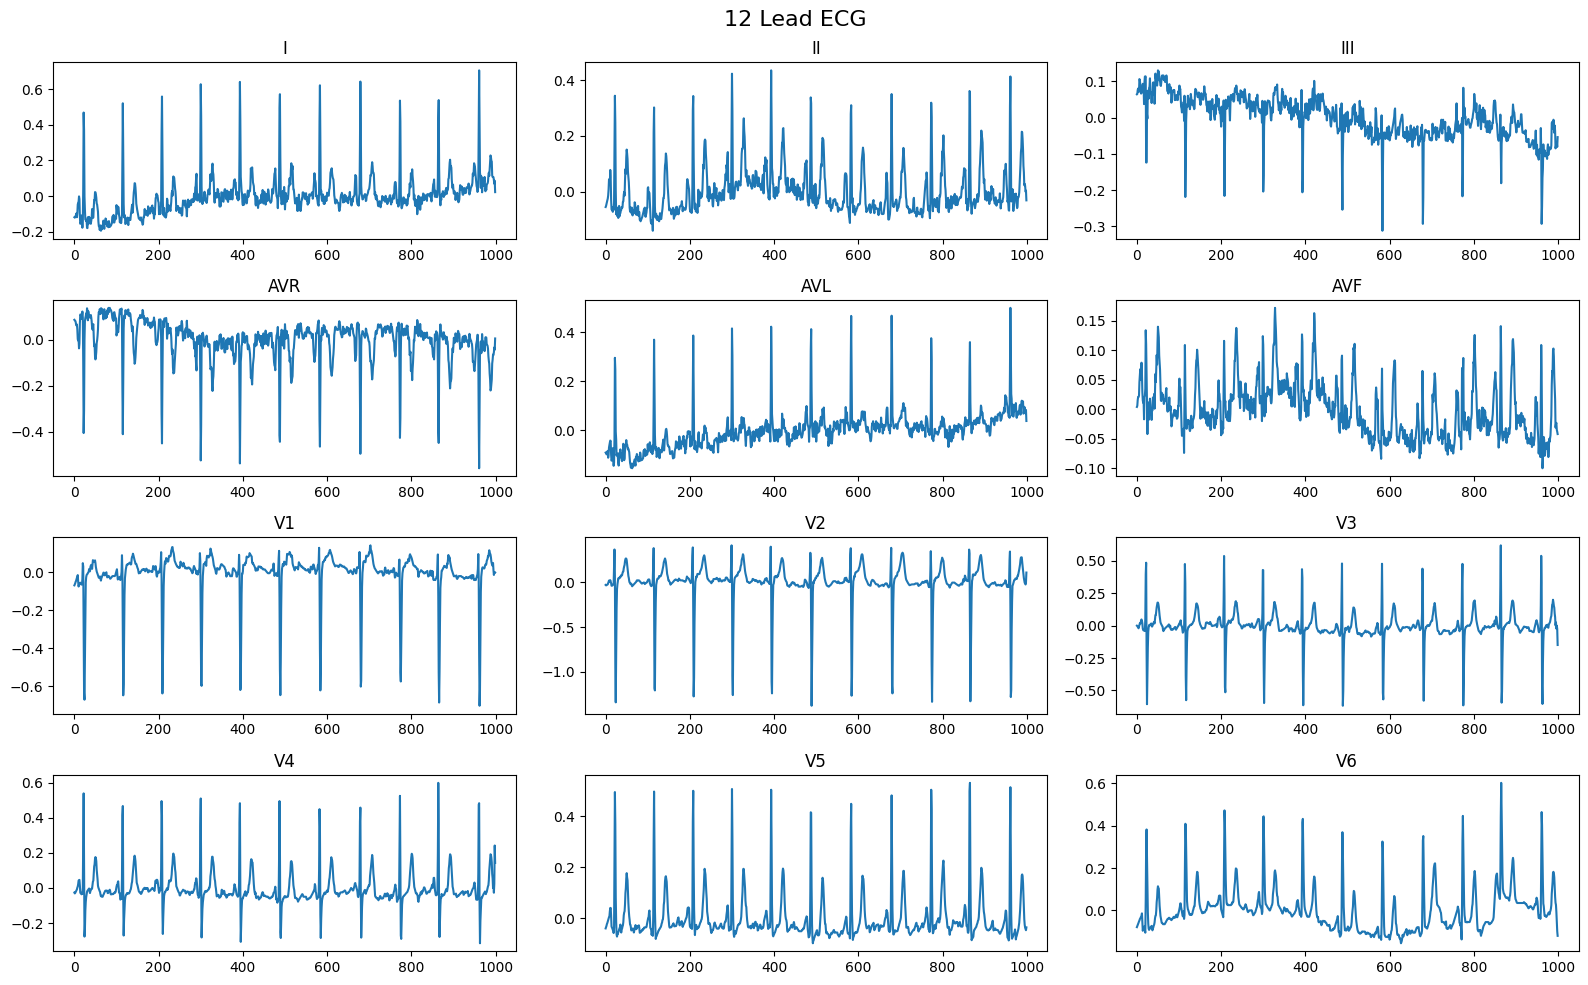

In [1]:
import wfdb
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras


record=wfdb.rdsamp('00001_lr')
df = pd.DataFrame(record[0], columns=record[1]['sig_name'])
df.to_csv('12_lead.csv', index=False)

#plot ECG using this 12 lead ECG csv file
def plot_ecg(df, title, figsize=(16, 10)):
    fig, axes = plt.subplots(4, 3, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        ax.plot(df.iloc[:, i])
        ax.set_title(df.columns[i])
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_ecg(df, '12 Lead ECG')


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('12_lead.csv')

# Split into input and output variables
X = data.iloc[:,:3].values
y = data.iloc[:, 3:].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(1, X_train.shape[2]), activation='linear', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(9, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred = model.predict(X_test)
print("\ny_pred:\n", y_pred)








Epoch 1/100
25/25 [==============================] - 3s 37ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 2/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 3/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 4/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0073

In [19]:
# Calculate correlation coefficient
corr_coef = np.corrcoef(y_test.flatten(), y_pred.flatten())[0][1]
print('Correlation coefficient:', corr_coef)
def correlation_coefficient(y_true, y_pred):
    corr = np.corrcoef(y_true, y_pred)[0][1]
    return corr

for i in range(0,9):
    print("Correlation coefficient for feature",i+4,":",correlation_coefficient(y_test[:,i], y_pred[:,i]))

Correlation coefficient: 0.7144658698060896
Correlation coefficient for feature 4 : 0.9993751074462516
Correlation coefficient for feature 5 : 0.998975394469823
Correlation coefficient for feature 6 : 0.998469226272641
Correlation coefficient for feature 7 : 0.6585908993988008
Correlation coefficient for feature 8 : 0.5315383030047671
Correlation coefficient for feature 9 : 0.5542982247023539
Correlation coefficient for feature 10 : 0.8220034089363005
Correlation coefficient for feature 11 : 0.9535120717852359
Correlation coefficient for feature 12 : 0.7991193843911687


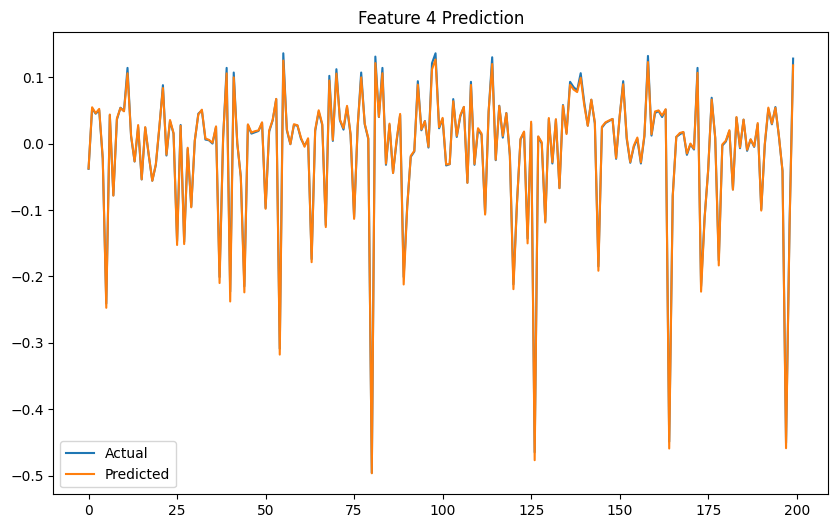

Correlation coefficient for feature 4 : 0.9993751074462516


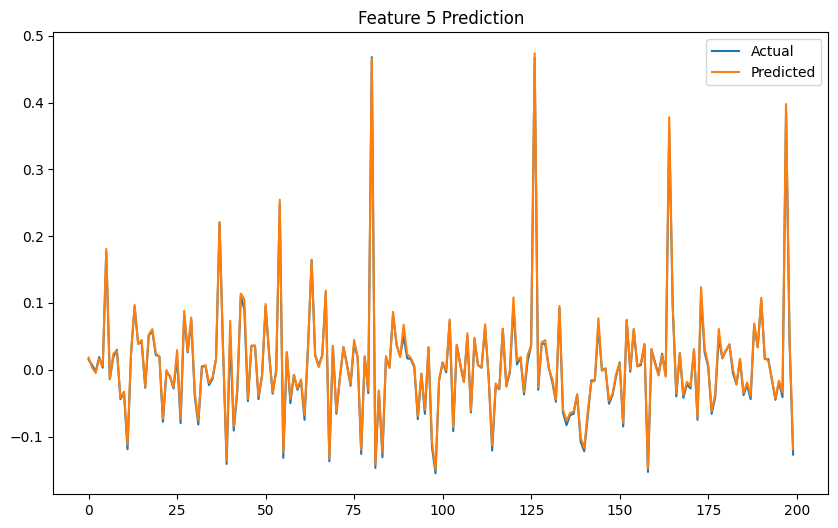

Correlation coefficient for feature 5 : 0.998975394469823


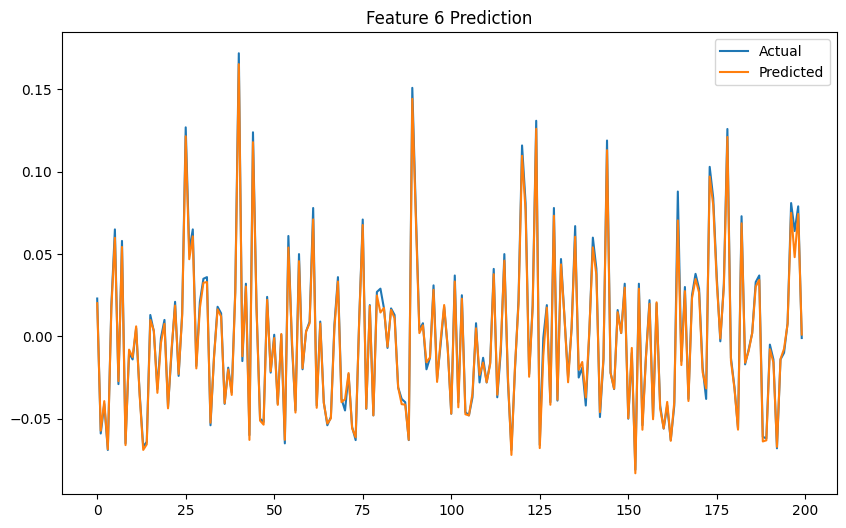

Correlation coefficient for feature 6 : 0.998469226272641


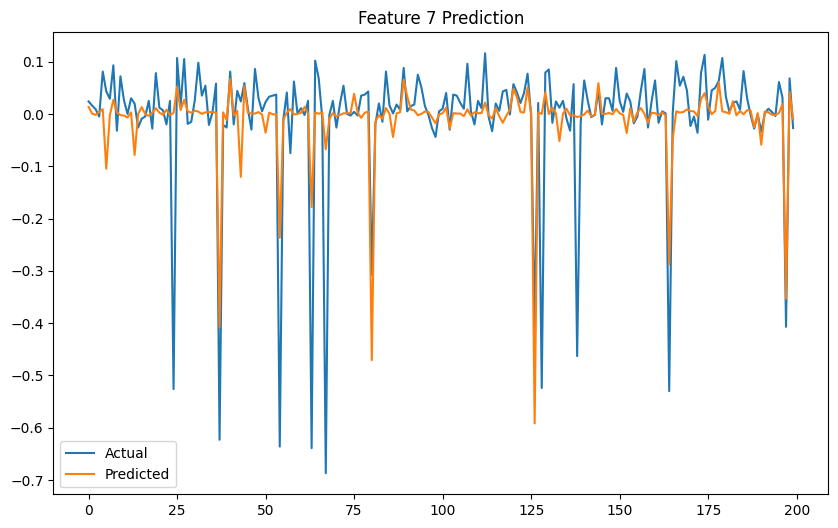

Correlation coefficient for feature 7 : 0.6585908993988008


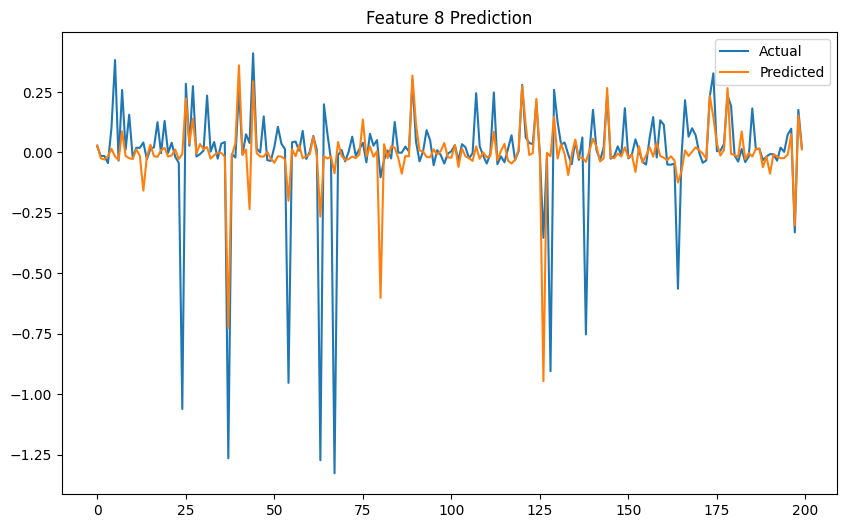

Correlation coefficient for feature 8 : 0.5315383030047671


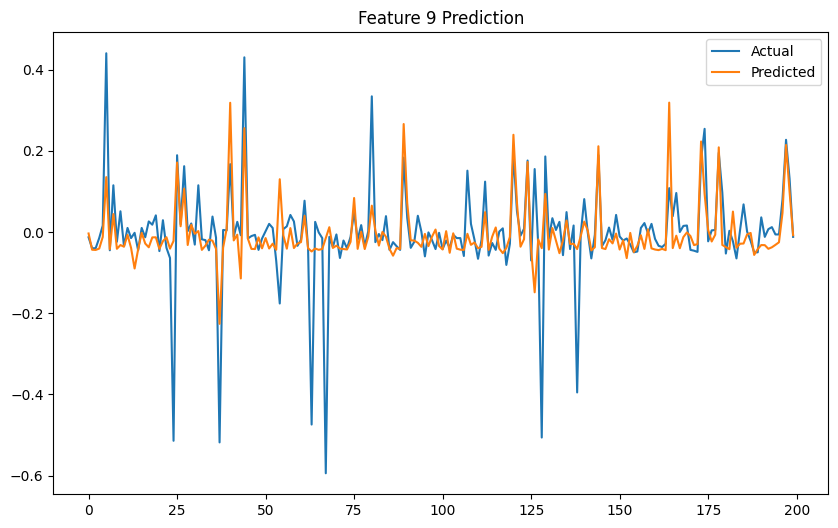

Correlation coefficient for feature 9 : 0.5542982247023539


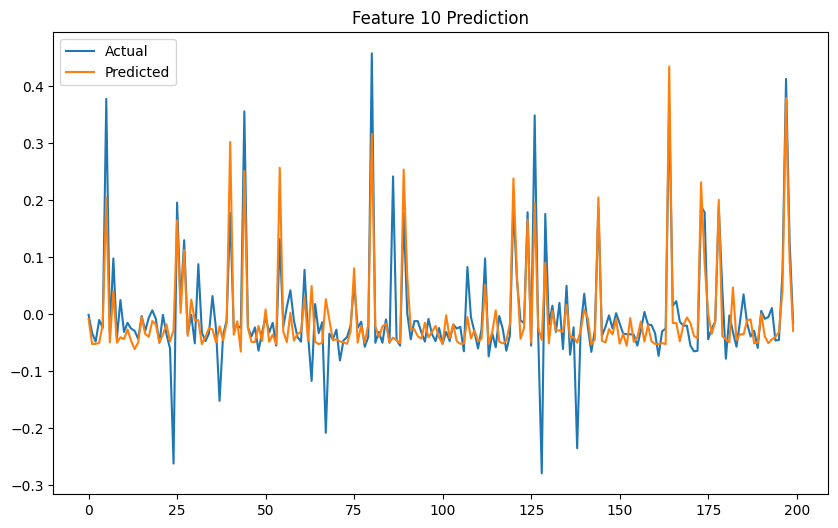

Correlation coefficient for feature 10 : 0.8220034089363005


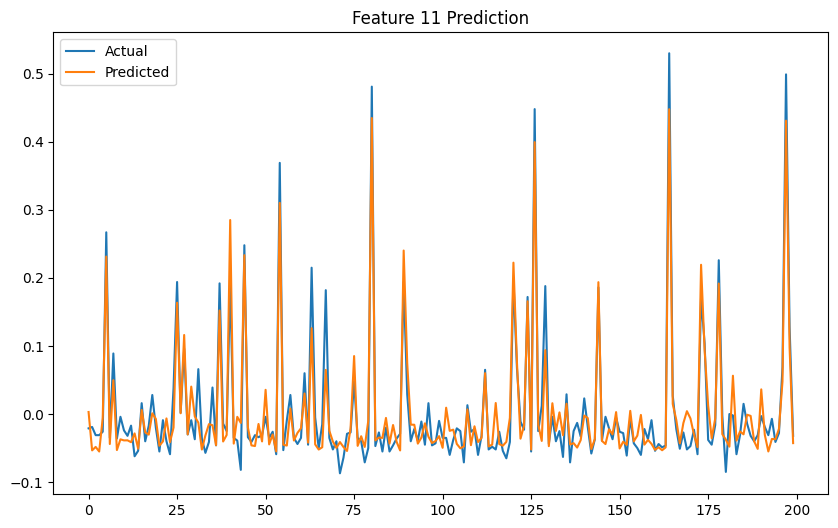

Correlation coefficient for feature 11 : 0.9535120717852359


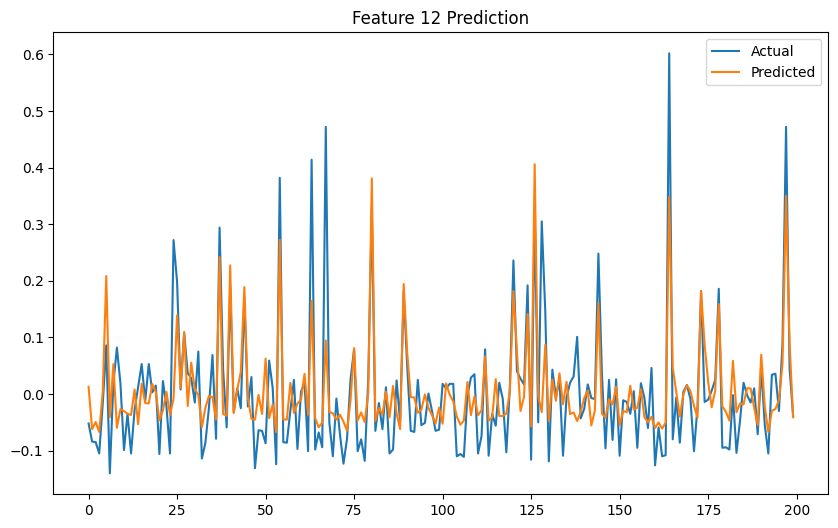

Correlation coefficient for feature 12 : 0.7991193843911687


In [20]:

# Plot actual vs predicted values
for i in range(0,9):
    
    plt.figure(figsize=(10, 6))
    plt.plot(y_test[:,i], label='Actual')
    plt.plot(y_pred[:,i], label='Predicted')
    plt.title('Feature ' + str(i+4) + ' Prediction')
    plt.legend()
    plt.show()
    print("Correlation coefficient for feature",i+4,":",correlation_coefficient(y_test[:,i], y_pred[:,i]))